<a href="https://colab.research.google.com/github/ldm2060/LearningNote/blob/main/DL%202023.6/week4/%E8%A7%86%E9%A2%91%E7%AC%94%E8%AE%B0/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK4

## 4.1 自注意力机制

vector set as input

Self-attention：考虑一整个set的内容作为输入  
  - 输出：一个set


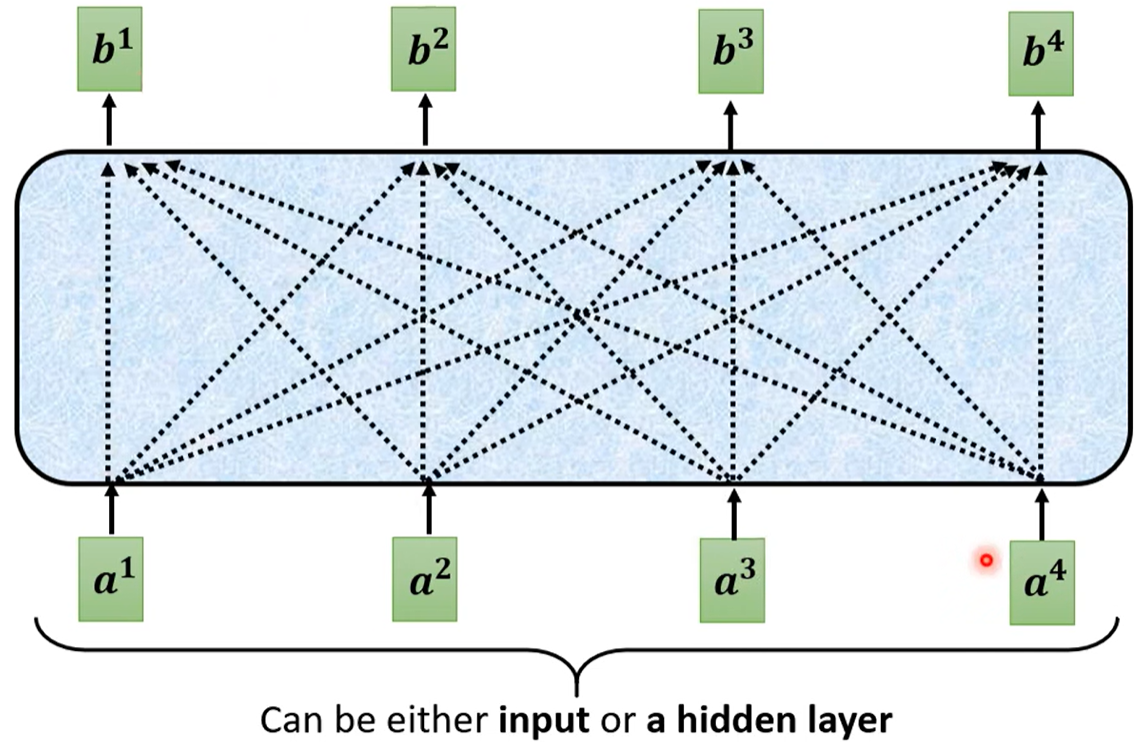

ouput $b^i$：find the relevant(with $a^i$) vectors in sequence

如何知道相关度：一个attention模块（如dot product），输入为两个向量，输出为相关度

计算相关度模块例子：


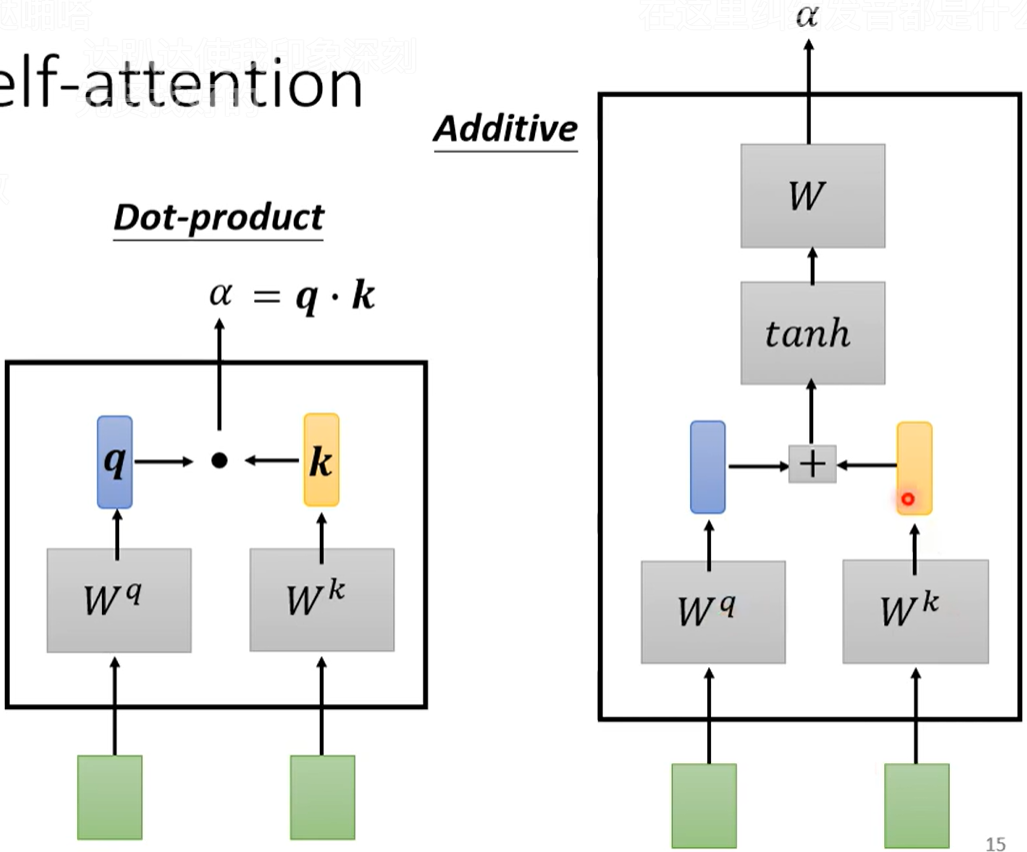


$b^1 = \sum_i a'_{1,i} v^i$



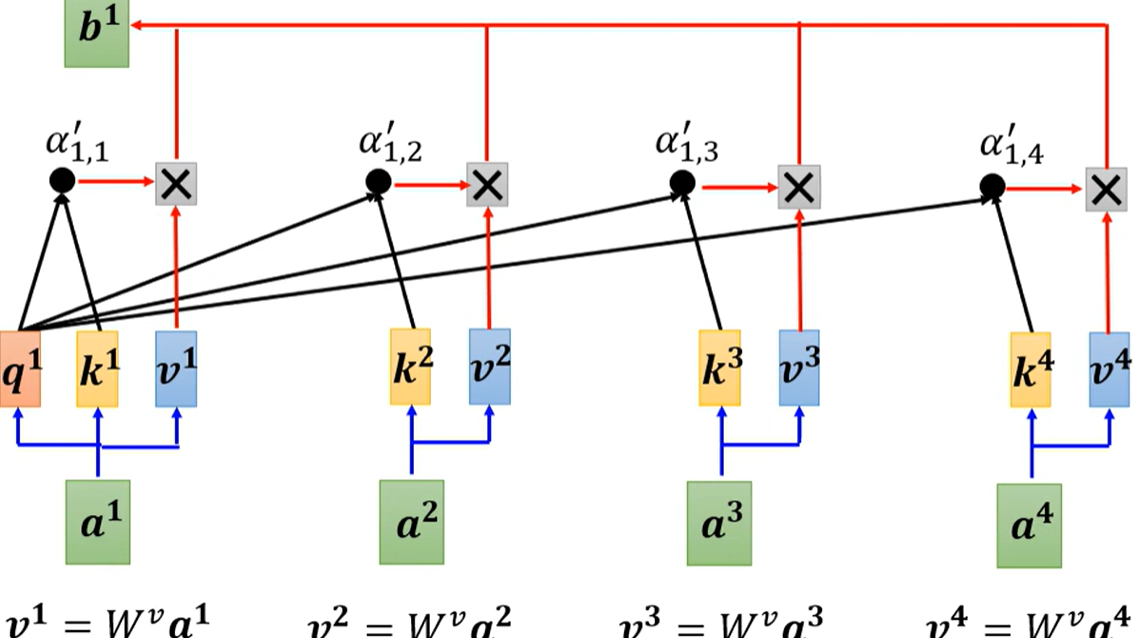